In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Stream Data

In [3]:
df1 = pd.read_csv('data/Mar_12/tweets-stream-2.csv')
df2 = pd.read_csv('data/Mar_12/tweets-stream-3.csv')
df3 = pd.read_csv('data/Mar_12/tweets-stream-4.csv')
df4 = pd.read_csv('data/Mar_12/tweets-stream-5.csv')
df5 = pd.read_csv('data/Mar_12/tweets-stream-6.csv')
df6 = pd.read_csv('data/Mar_12/tweets-stream-1.csv')

In [4]:
df_stream = pd.concat([df1,  df2, df3, df4, df5, df6], axis=0)

In [5]:
# Convert to datetime
df_stream['created_at'] = pd.to_datetime(df_stream['created_at'])

In [6]:
# Filter unique Tweets ids
df_stream = df_stream.drop_duplicates(subset=['id'])

## Posting Frequency

- Average iter-tweet time

In [113]:
df_stream['iter_tweet_time'] = df_stream.groupby('author_id')['created_at'].diff()
# df_stream['iter_tweet_time_seconds'] = df_stream['iter_tweet_time'].dt.seconds

In [114]:
avg_iter_tweet_time = df_stream.groupby('author_id')['iter_tweet_time'].mean().reset_index()

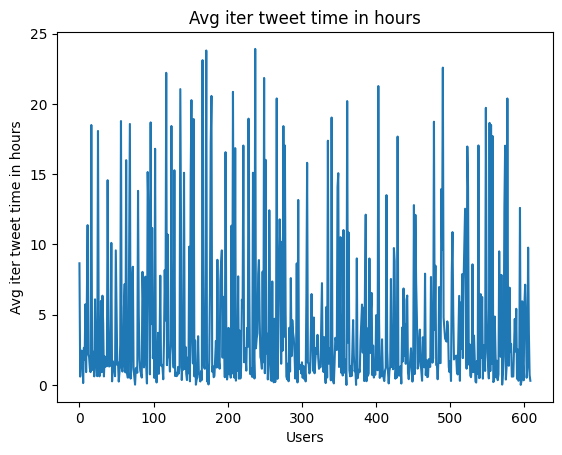

In [115]:
sns.lineplot(x=avg_iter_tweet_time.index, y=avg_iter_tweet_time['iter_tweet_time'].dt.seconds/3600);

plt.xlabel("Users");
plt.ylabel("Avg iter tweet time in hours");
plt.title("Avg iter tweet time in hours");

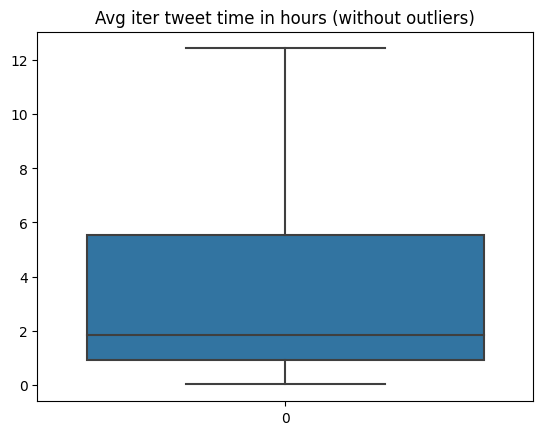

In [116]:
sns.boxplot(avg_iter_tweet_time['iter_tweet_time'].dt.seconds/3600, showfliers=False);
plt.title("Avg iter tweet time in hours (without outliers)");

- Total number of posts

In [117]:
n_posts = df_stream.groupby('author_id').size().to_frame('n_posts').reset_index()

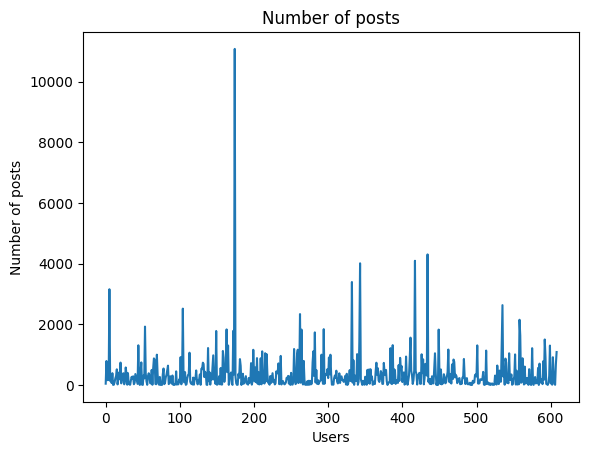

In [118]:
sns.lineplot(x=n_posts.index, y=n_posts['n_posts']);

plt.xlabel("Users");
plt.ylabel("Number of posts");
plt.title("Number of posts");

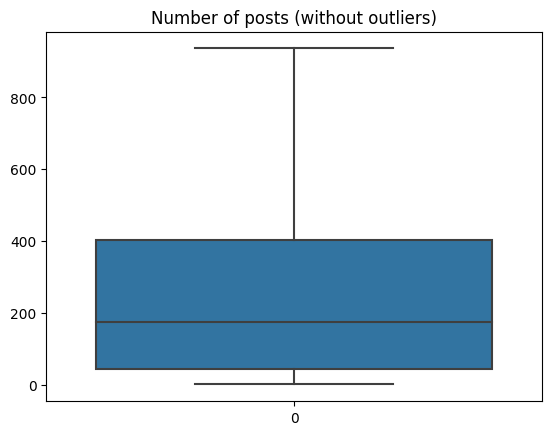

In [119]:
sns.boxplot(n_posts['n_posts'], showfliers=False);
plt.title("Number of posts (without outliers)");

- Average posts per week

In [120]:
df_stream['created_at_week'] = df_stream['created_at'].dt.strftime('%U')

In [121]:
posts_per_week = df_stream.groupby(['author_id', 'created_at_week']).size().to_frame('posts_per_week').reset_index()

In [122]:
avg_posts_per_week = posts_per_week.groupby('author_id').mean(numeric_only=True).reset_index()

In [123]:
print('Total number of weeks: ', len(df_stream['created_at_week'].unique()))

Total number of weeks:  4


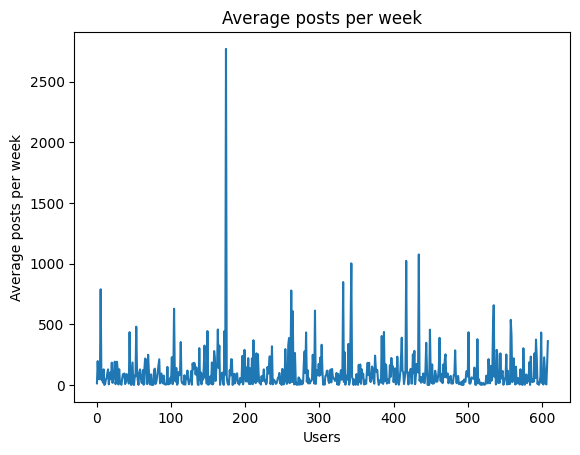

In [124]:
sns.lineplot(x=avg_posts_per_week.index, y=avg_posts_per_week['posts_per_week']);

plt.xlabel("Users");
plt.ylabel("Average posts per week");
plt.title("Average posts per week");

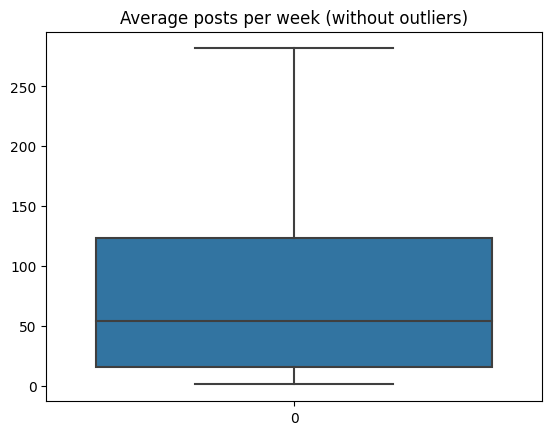

In [125]:
sns.boxplot(avg_posts_per_week['posts_per_week'], showfliers=False);
plt.title("Average posts per week (without outliers)");

- Average posts per week (rt, rp, quotes, original)

In [135]:
public_metrics = df_stream.groupby(['author_id', 'created_at_week']).agg({
    'public_metrics_retweet_count': 'sum',
    'public_metrics_reply_count': 'sum',
    'public_metrics_like_count': 'sum',
    'public_metrics_quote_count': 'sum'
}).reset_index().groupby(['author_id']).mean(numeric_only=True).reset_index()

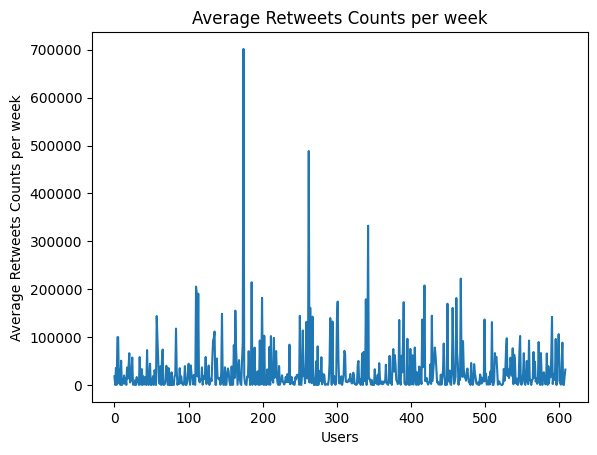

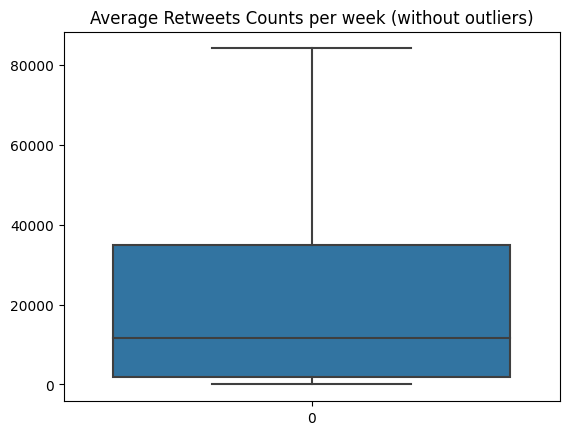

In [143]:
sns.lineplot(x=public_metrics.index, y=public_metrics['public_metrics_retweet_count']);

plt.xlabel("Users");
plt.ylabel("Average Retweets Counts per week");
plt.title("Average Retweets Counts per week");

plt.show()

sns.boxplot(public_metrics['public_metrics_retweet_count'], showfliers=False);
plt.title("Average Retweets Counts per week (without outliers)");

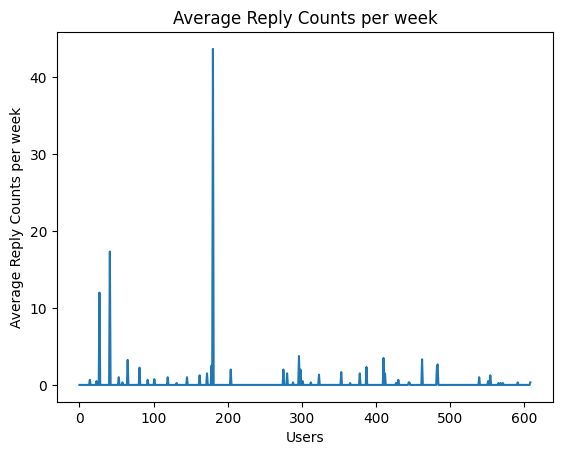

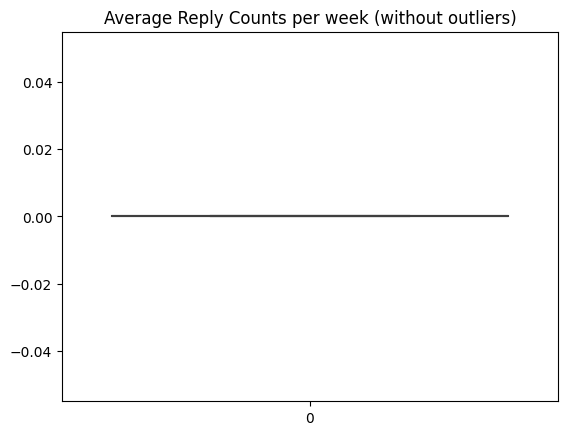

In [144]:
sns.lineplot(x=public_metrics.index, y=public_metrics['public_metrics_reply_count']);

plt.xlabel("Users");
plt.ylabel("Average Reply Counts per week");
plt.title("Average Reply Counts per week");

plt.show()

sns.boxplot(public_metrics['public_metrics_reply_count'], showfliers=False);
plt.title("Average Reply Counts per week (without outliers)");

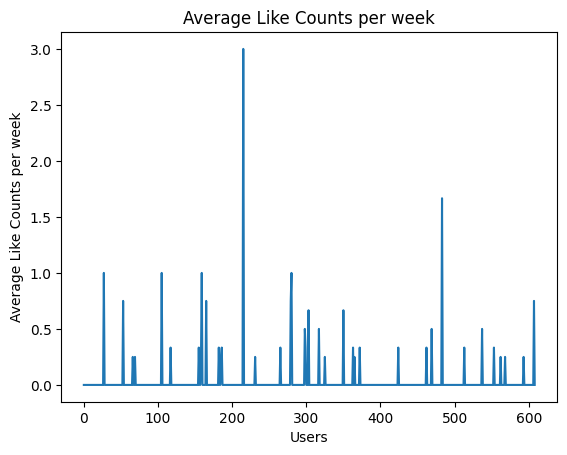

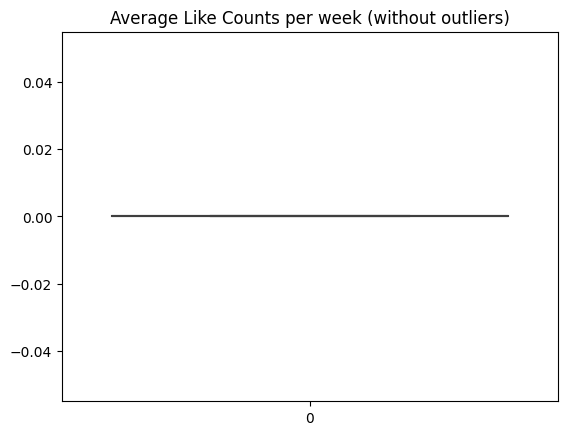

In [145]:
sns.lineplot(x=public_metrics.index, y=public_metrics['public_metrics_like_count']);

plt.xlabel("Users");
plt.ylabel("Average Like Counts per week");
plt.title("Average Like Counts per week");

plt.show()

sns.boxplot(public_metrics['public_metrics_like_count'], showfliers=False);
plt.title("Average Like Counts per week (without outliers)");

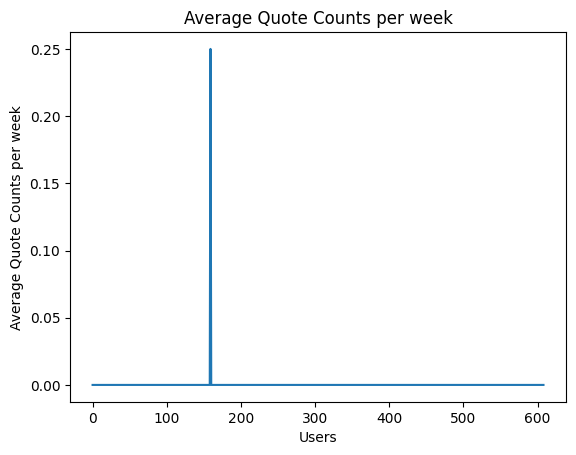

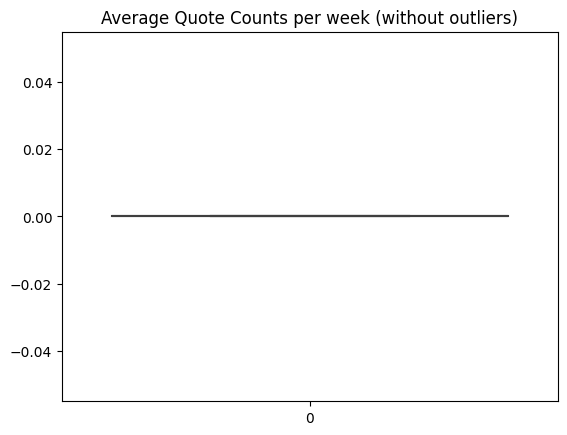

In [148]:
sns.lineplot(x=public_metrics.index, y=public_metrics['public_metrics_quote_count']);

plt.xlabel("Users");
plt.ylabel("Average Quote Counts per week");
plt.title("Average Quote Counts per week");

plt.show()

sns.boxplot(public_metrics['public_metrics_quote_count'], showfliers=False);
plt.title("Average Quote Counts per week (without outliers)");

#### TO DO: 
- same as above for the use of mentions, URLs, media
- total number of links to other social media 
- total number of links to alternative social media 
- same as above but distinguishing sentiment, emotion and other characteristics of the tweets
- filter out bots

# Rewards

- Received likes at the tweet and user level (avg, std)

In [19]:
# Metrics at at the tweet level
public_metrics = df_stream.groupby(['author_id']).agg(
    # Mean
    public_metrics_retweet_count_mean=('public_metrics_retweet_count','mean'),
    public_metrics_reply_count_mean=('public_metrics_reply_count','mean'),
    public_metrics_like_count_mean=('public_metrics_like_count','mean'),
    public_metrics_quote_count_mean=('public_metrics_quote_count','mean'),
    # Std
    public_metrics_retweet_count_std=('public_metrics_retweet_count','std'),
    public_metrics_reply_count_std=('public_metrics_reply_count','std'),
    public_metrics_like_count_std=('public_metrics_like_count','std'),
    public_metrics_quote_count_std=('public_metrics_quote_count','std')
).reset_index()

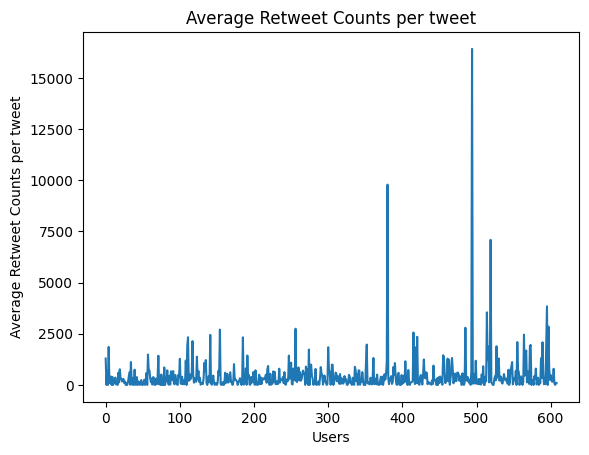

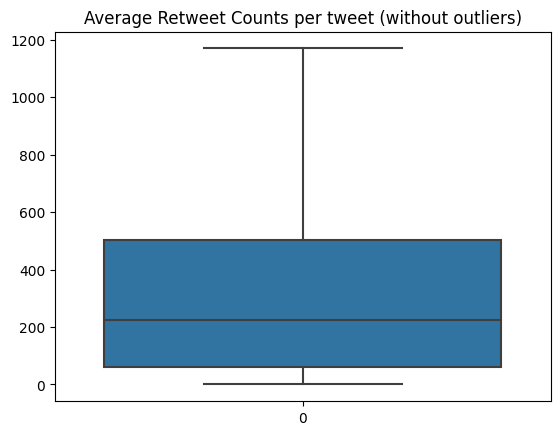

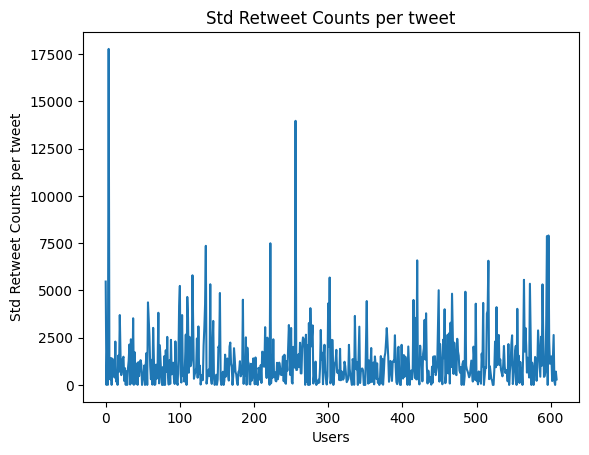

In [27]:
sns.lineplot(x=public_metrics.index, y=public_metrics['public_metrics_retweet_count_mean']);

plt.xlabel("Users");
plt.ylabel("Average Retweet Counts per tweet");
plt.title("Average Retweet Counts per tweet");

plt.show()

sns.boxplot(public_metrics['public_metrics_retweet_count_mean'], showfliers=False);
plt.title("Average Retweet Counts per tweet (without outliers)");

plt.show()

sns.lineplot(x=public_metrics.index, y=public_metrics['public_metrics_retweet_count_std']);

plt.xlabel("Users");
plt.ylabel("Std Retweet Counts per tweet");
plt.title("Std Retweet Counts per tweet");

plt.show()

# sns.boxplot(public_metrics['public_metrics_retweet_count_std'], showfliers=False);
# plt.title("Std Retweet Counts per tweet (without outliers)");

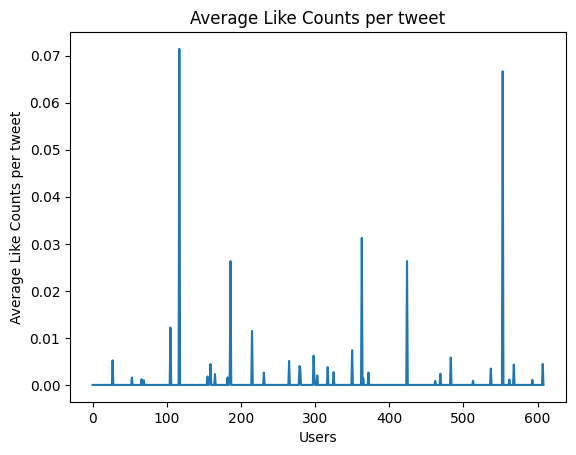

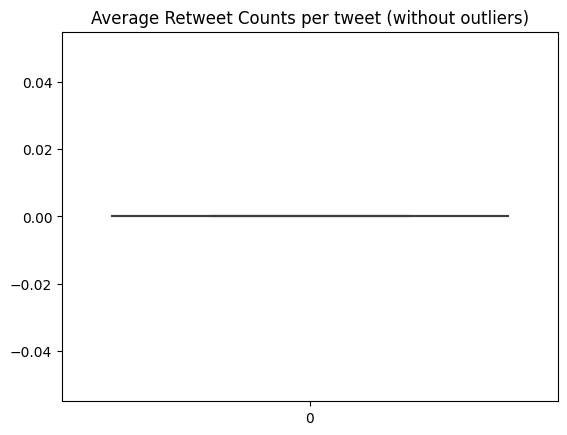

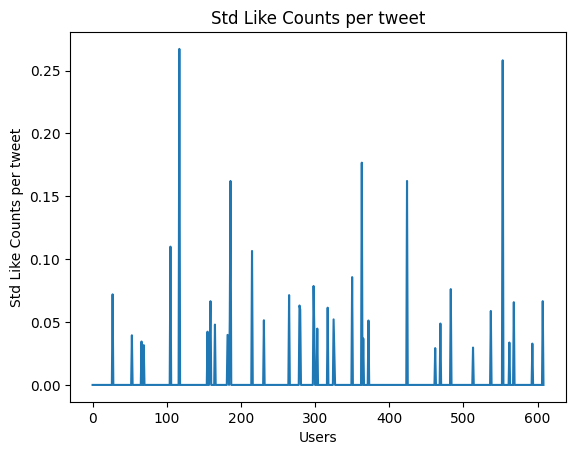

In [28]:
sns.lineplot(x=public_metrics.index, y=public_metrics['public_metrics_like_count_mean']);

plt.xlabel("Users");
plt.ylabel("Average Like Counts per tweet");
plt.title("Average Like Counts per tweet");

plt.show()

sns.boxplot(public_metrics['public_metrics_like_count_mean'], showfliers=False);
plt.title("Average Retweet Counts per tweet (without outliers)");

plt.show()

sns.lineplot(x=public_metrics.index, y=public_metrics['public_metrics_like_count_std']);

plt.xlabel("Users");
plt.ylabel("Std Like Counts per tweet");
plt.title("Std Like Counts per tweet");

plt.show()

# sns.boxplot(public_metrics['public_metrics_like_count_std'], showfliers=False);
# plt.title("Std Like Counts per tweet (without outliers)");

In [34]:
# Metrics at at the user level
print('Mean: \n')
print(df_stream[['public_metrics_retweet_count', 'public_metrics_reply_count', 'public_metrics_like_count', 'public_metrics_quote_count']].mean())

print('\nStd: \n')
print(df_stream[['public_metrics_retweet_count', 'public_metrics_reply_count', 'public_metrics_like_count', 'public_metrics_quote_count']].std())

Mean: 

public_metrics_retweet_count    274.575455
public_metrics_reply_count        0.001889
public_metrics_like_count         0.000349
public_metrics_quote_count        0.000005
dtype: float64

Std: 

public_metrics_retweet_count    1695.646665
public_metrics_reply_count         0.043420
public_metrics_like_count          0.018686
public_metrics_quote_count         0.002144
dtype: float64


# TO DO: 
- Misinformation: from shared URLs
- Political leaning: from shared URLs